In [1]:
import networkx as nx
import csv

In [25]:
with open('nutrient_data.csv', 'r') as nutrient_data:
    nutrient = csv.reader(nutrient_data)

    G = nx.Graph()
    for row in nutrient:
        source, target = row
        G.add_edge(source, target)

In [ ]:
degrees = G.degree()
nodes = G.nodes()


In [27]:
nx.degree_centrality(G)

{'A': 0.17500000000000002,
 'carrots': 0.05,
 'eggs': 0.07500000000000001,
 'fatty fish': 0.125,
 'green leafy vegs': 0.15000000000000002,
 'liver': 0.15000000000000002,
 'milk': 0.125,
 'tomatoes': 0.1,
 'B12': 0.125,
 'B6': 0.2,
 'asparagus': 0.05,
 'beans': 0.07500000000000001,
 'kidneys': 0.1,
 'potatoes': 0.07500000000000001,
 'C': 0.125,
 'pumpkins': 0.025,
 'Ca': 0.125,
 'broccoli': 0.05,
 'cheese': 0.025,
 'Cu': 0.17500000000000002,
 'nuts': 0.125,
 'whole grains': 0.1,
 'D': 0.07500000000000001,
 'mushrooms': 0.025,
 'E': 0.1,
 'seeds': 0.07500000000000001,
 'Mn': 0.15000000000000002,
 'legumes': 0.05,
 'wheat': 0.025,
 'Se': 0.07500000000000001,
 'Zn': 0.17500000000000002,
 'beef': 0.125,
 'riboflavin': 0.125,
 'niacin': 0.125,
 'folates': 0.07500000000000001,
 'spinach': 0.025,
 'poultry': 0.07500000000000001,
 'shellfish': 0.05,
 'thiamin': 0.025,
 'veg oils': 0.025,
 'yogurt': 0.025}

In [28]:
nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)

{'A': 0.22041098891135102,
 'carrots': 0.060992442920943156,
 'eggs': 0.11706122510501452,
 'fatty fish': 0.21002236347439504,
 'green leafy vegs': 0.1602042983742882,
 'liver': 0.2812584658403646,
 'milk': 0.14970858565365472,
 'tomatoes': 0.07707507334590845,
 'B12': 0.18731155057919585,
 'B6': 0.3346038903712275,
 'asparagus': 0.08655959804970313,
 'beans': 0.19317297937437802,
 'kidneys': 0.21852498815655397,
 'potatoes': 0.19317297937437802,
 'C': 0.07189385018102809,
 'pumpkins': 0.015001609605245943,
 'Ca': 0.07798325029540887,
 'broccoli': 0.03127381109517402,
 'cheese': 0.016272201489928077,
 'Cu': 0.27401824529192553,
 'nuts': 0.21306470528528393,
 'whole grains': 0.13153583070655125,
 'D': 0.0784778833996966,
 'mushrooms': 0.016375159058712153,
 'E': 0.10100161246635554,
 'seeds': 0.08970867959249562,
 'Mn': 0.14319305415703718,
 'legumes': 0.061864773459487356,
 'wheat': 0.029878457662727825,
 'Se': 0.12150217295200741,
 'Zn': 0.31717729533327366,
 'beef': 0.245823421620610

In [35]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

In [55]:

label = nx_comm.modularity(G, nx_comm.label_propagation_communities(G))
print(label)

0.4294222222222222


In [ ]:
louvain = community_louvain.best_partition(G)
print(louvain)
community_louvain.best_partition(G)

{'A': 3, 'carrots': 3, 'eggs': 2, 'fatty fish': 3, 'green leafy vegs': 1, 'liver': 0, 'milk': 3, 'tomatoes': 3, 'B12': 2, 'B6': 0, 'asparagus': 0, 'beans': 0, 'kidneys': 0, 'potatoes': 0, 'C': 3, 'pumpkins': 3, 'Ca': 3, 'broccoli': 3, 'cheese': 3, 'Cu': 0, 'nuts': 1, 'whole grains': 1, 'D': 3, 'mushrooms': 3, 'E': 1, 'seeds': 1, 'Mn': 1, 'legumes': 2, 'wheat': 1, 'Se': 0, 'Zn': 0, 'beef': 2, 'riboflavin': 2, 'niacin': 1, 'folates': 0, 'spinach': 0, 'poultry': 2, 'shellfish': 0, 'thiamin': 1, 'veg oils': 1, 'yogurt': 3}


In [141]:
n_size = []
for item in degrees:
    number = item[1] * 12
    n_size.append(number)

/var/folders/ws/dtysg26j0ml1937drnq64gfw0000gn/T/ipykernel_59342/2362607315.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(louvain.values()) + 1)


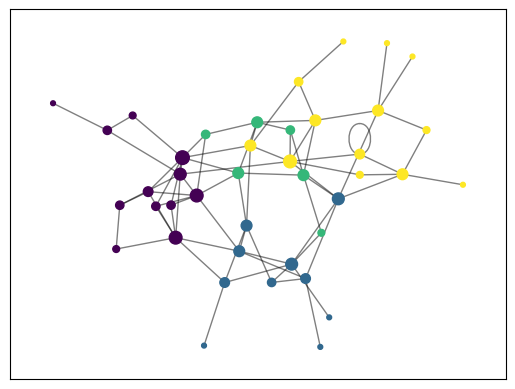

In [142]:
pos1 = nx.spring_layout(G, seed=30)

cmap = cm.get_cmap('viridis', max(louvain.values()) + 1)
nx.draw_networkx_nodes(G, pos1, louvain.keys(), node_size=n_size, cmap=cmap, node_color=list(louvain.values()))
nx.draw_networkx_edges(G, pos1, alpha=0.5)
plt.show()